<center><h1>QBUS6850 - Machine Learning for Business</h1></center>

# Tutorial 3 – Practicing Linear Regression

**Roadmap: tutorial 3**  

1. LR with normal equation
2. LR with `sklearn`
3. LR with Gradient Descent (manual)

**Review: Lecture 2**


**Review: Tutorial 2**  
1. import libraries
    - `import numpy as np`
    - `import pandas as pd`
    - `import matplotlib.pyplot as plt`
    
    
2. numpy  
    - create a new vector or a matrix: `np.array([])`, `np.matrix([])`
    - special vectors / matrices: `np.zeros()`, `np.ones()`
    - inner product: `np.dot()` or `A * A.T` or `A * A.transpose()`
    - norm: `np.linalg.norm(a, ord = 2) `
    - orthogonality
    - diagonal matrix or diagonal elements: `np.diag(A)`
    - rank: `np.linalg.matrix_rank(A)`
    - trace: `np.trace(A)`
    - determinant: `np.linalg.det(A)`
    


3. pandas  
    - load dataset: `pd.read_csv`
    - info checking: `df.head()`, `df.info()`, `df.describe()`...
    - data manipulation: `df['col'].dropna()`, `df['col'].fillna(value)`, `df['newcol'] = formula`, `df[(con1) & (con2)]`...
    
    

4. pyplot
    - bar chart: `plt.bar(x, y)`
    - line plot: `plt.plot(x, y)`
    - others: `plt.xticks()`, `plt.xlabel()`, `plt.legend()`

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Regression Manually

In the first task of this tutorial, you have a chance to work out a python program for linear regression yourself. You will start with the linear regression solution formula

$$
\boldsymbol{\beta}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{t}
$$

where $𝑿$ is the data matrix.
### step.1: generate synthetic data

In [2]:
# use `make_regression` to generate synthetic data
from sklearn.datasets.samples_generator import make_regression

# generate 20 samples
N = 20


# get x, y and true betas
x, y, true_coef = make_regression(n_samples = N, n_features = 1, noise=20, coef=True)

### Step 2: check the value of variables x and y, and true_coef

- Write down the size of x, y, and true_coef. 
- Is this x a matrix, or two dimensional array? From this information, can you guess what the linear model is.
- you can even visualize the data by using the following code:

In [3]:
# the size of x, y and true_coef
print(np.shape(x))
print(np.shape(y))
print(np.shape(true_coef))

(20, 1)
(20,)
()


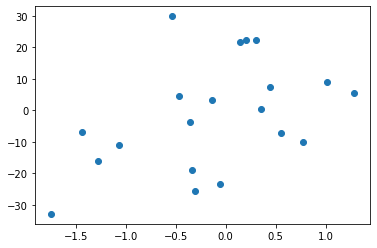

In [4]:
# Scatter plot
plt.figure()
plt.scatter(x, y);

### Step 3: include intercept term
In lecture, you were told that in order to build a linear regression model with the intercept, we shall expand the data matrix to the one with all 1’s in its first column. Write code first this, Or your tutor will tell you how to do this

In [5]:
# combine 1s column and the original X
X = np.column_stack((np.ones(N), x))

# Convert X (an array) to a matrix, thus we can use matrix operations in numpy easier. 
# If you are familiar with python array, this step is not necessary.
X = np.asmatrix(X)

In [6]:
X#.shape

matrix([[ 1.        , -1.06797985],
        [ 1.        , -0.30810826],
        [ 1.        ,  0.35557901],
        [ 1.        , -1.27982216],
        [ 1.        ,  0.44138855],
        [ 1.        , -0.46355876],
        [ 1.        ,  0.30706465],
        [ 1.        , -1.74691839],
        [ 1.        , -0.05355061],
        [ 1.        , -0.33911432],
        [ 1.        , -0.54240758],
        [ 1.        ,  0.20528397],
        [ 1.        ,  0.14056867],
        [ 1.        ,  0.77833191],
        [ 1.        , -0.14097895],
        [ 1.        ,  1.01776494],
        [ 1.        , -1.44144942],
        [ 1.        , -0.35939889],
        [ 1.        ,  1.28349146],
        [ 1.        ,  0.54920991]])

### Step 4: find the solution according to the normal equation
$$
\boldsymbol{\beta}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{t}
$$

When this $𝑿$ is a matrix, we can “translate” the solution easily to the python statement as:

In [7]:
# Estimate linear regression coefficients 
lin_betas = np.linalg.inv(X.T*X) * X.T * y.reshape(N,1)

If you compare the above statement with the solution formula, you will find
- how we get the inverse of a matrix, and 
- how we change the (1D) array y into a column vector.     

Can you identify these in the statement?

### Step 5: check $\beta_0$ and  $\beta_1$
As this is a simple linear regression, there are two parameters beta(s), that is beta_0 (intercept) and a coefficient beta_1. They have been given in the variable lin_betas. You can check them by using the following code:

In [8]:
# beta_0
lin_intercept = lin_betas[0,0]
print("intercept (beta_0): {0:.2f}".format(lin_intercept))

# beta_1
lin_beta = lin_betas[1,0]
print("beta_1: {0:.2f}".format(lin_beta))


intercept (beta_0): -0.22
beta_1: 9.31


### Step 6: use the model to predict y for a new x
Here is an example

In [9]:
# give new x
x_1 = 1

# use the LR expression that we just found (with beta_0 and beta_1)
prediction = lin_intercept + lin_beta * x_1

# and print the result
print("Predicted value at x = {0}: {1:.2f}".format(x_1, prediction))

Predicted value at x = 1: 9.09


The new x is `x_1=1`. In the second statement above, you must clearly write out your linear model with the learned intercept value and coefficient value. This will give the predicted value.

## Task 2 - Linear Regression And Prediction

In task 1, we managed work the linear regression solution manually. Although it is tedious, it is still quite easy to modify the program for other datasets. In this second task, you will learn how to use a python machine learning package `sklearn` to do regression. You can leave all the chores to the package such as making matrix, calling inverse operation, preparing model for prediction etc.

### Step 1: load the important libraries

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

You shall follow the third statement to load LinearRegression model. Before we use the model, we need prepare data. This time we load data from a data file.

In [11]:
# Load data
clock_auction_df = pd.read_csv("auction.txt", delimiter="\t")

#Get some info of the data
clock_auction_df.info()

FileNotFoundError: [Errno 2] File b'auction.txt' does not exist: b'auction.txt'

In [ ]:
clock_auction_df.head()

In [ ]:
clock_auction_df.describe()

We assume everyone understands the above statement. Ask yourself a question: 
- what is the data type of `clock_auction_df`? 
- How many columns, and what are they? 

We would like to build a linear regression to regress the price variable over others. Given that we are going to use linear regression model, we certainly need make sure the target variable price actually has some linear relation with some or all features. This process is called Exploratory Data Analysis (EDA). 

### Step 2: check the correlation between variables
Looking at the correlation is one of wonderful EDA ways to start with. This can be easily done by using the pandas package. Now type the following into your program

In [ ]:
clock_auction_df.corr()

This statement helps you check linear correlation between variables. You will see that variable `Age` has stronger linear association with Price than Bidders. (Why?) 

Hence we fit a model Price (t) ~ Age (x). Now we start prepare data `X` and `t`. They should be taken from the `DataFram`e variable` clock_auction_df`

Variable Age has stronger linear association with Price than Bidders. Fit a model Price ~ Age.

In [ ]:
x_data = np.reshape(clock_auction_df["Age"].values, (len(clock_auction_df), 1))
y_data = np.reshape(clock_auction_df["Price"].values, (len(clock_auction_df), 1))

Now data has been prepared. It is time to define a linear regression model. This is the first example from which you can learn how to use sklearn package to do machine learning. We always start with the model you want.

### Step 3: Define the Linear Regression model

In [ ]:
# Create the linear regression object
lr_obj = LinearRegression()
# lr_obj = LinearRegression(fit_intercept=False)

# Estiamte coefficients
lr_obj.fit(x_data, y_data) # beta_0, beta_1

### Step 4: Predict the test data and get the predicted value

In [ ]:
# Predict the sale price of a 121 year old clock
age = np.array([[121]]) # new data age 121

predicted_price = lr_obj.predict(age)

print("Estimated Sale Price: ${0:.2f}.".format(predicted_price[0, 0]))

When you have finished the above steps, please address the following questions:
1. In this workflow, have you explicitly seen the algorithm (like our formula for beta or gradient descent algorithm)?
2. Did you prepare the special column of all 1s if we want to estimate the intercept?
3. Did you see the estimated intercept beta_0 and coefficient beta_1 as what we did in the first task?
4. Did we actually write out the fitted linear model?

In [ ]:
# beta_0
lr_obj.intercept_ 

In [ ]:
# beta_1
lr_obj.coef_

## Task 3 - Linear Regression Gradient Descent Manually

In this task, we will build our own Gradient Descent algorithm for linear regression.  This may serve an example for your assignment 1.

Import package `numpy` and `matplotlib.pyplot`:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Build a gradient descent function `Gradient_Descent_Algo`
The function will take feature:
- data x, 
- target data y, 
- the initial guessed coefficients beta, 
- learning rate alpha, 
- number of data N, and
- the number of iteration numIterations.

The function will return: 
- the estimated coefficient beta. 

The function is defined as follows (please copy into your program)

In [12]:
"""
Build the gradient descent function

"""
# m denotes the number of training examples here, not the number of features
def Gradient_Descent_Algo(x, y, beta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        # step1: 
        # predicted values from the model
        loss_temp = np.dot(x, beta) - y
        
        # step2: 
        # calculate the loss function
        loss = np.sum(np.square(loss_temp)) / (2 * m)
        # save all the loss function values at each step
        loss_total[i]= loss
        # You can check iteration by
        # print("Iteration: {0} | Loss fucntion: {1}".format(i, loss))
        
        # step3:
        # calcualte the gradient using matrix representation
        gradient = np.dot(xTrans, loss_temp) / m
        
        # step4:
        # update the parameters simulteneously with learning rate alpha
        beta = beta - alpha * gradient
        # save all the estimated parametes at each step
        beta_total[i,:]= beta.transpose()
        
    return beta

Questions:
1. Find out which statements are implementing the gradient descent updating rule?
2. Which statement gives the derivatives of loss function with respect to the coefficients (in its matrix form). Please refer to Lecture 2 slides

### Step 2. Produce a scatter plot of $t$ against $x$

Generate synthetic data from a linear model 

$$ f(x,\beta) = \beta_0 + \beta_1 x, $$
where $\beta_0=4,\beta_1=1.5$.

Add noise to true values

$$ t = f(x,\beta) + \epsilon, $$  

where $ \ \epsilon \ $ comes from a normal distribution with mean=0, standard deviation = 0.1



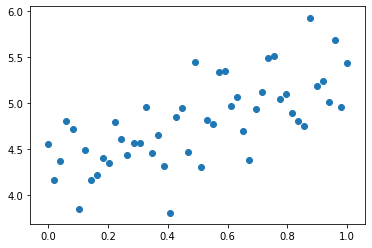

In [13]:
# Initialise RNG to generate the same random numbers each time
np.random.seed(0)

m = 50 # number of training examples
x = np.linspace(0.0, 1.0, m)

# Function true coefficients/parameters
beta0 = 4
beta1 = 1.5
 
# true values from linear model
f = beta0 + beta1 * x
# Add noisy
sigma2 = 0.1
y = f + np.random.normal(0, np.sqrt(sigma2), m)

# reshape
y = np.reshape(y, (len(y), 1))

x_data_1 = np.reshape(x, (len(x), 1))
x = np.column_stack((np.ones(len(x)), x_data_1))

fig0 = plt.figure()
plt.scatter(x[:,1],y);

### Step 3. Fitting model by using function `Gradient_Descent_Algo`

set learning rate α=0.0005α=0.0005 stop iteration after 10,000 iterations.

In [14]:
# using a specific number of iterations as stopping criteria
numIterations= 100000
# select the learning rate and initialize the vector to store loss / beta
alpha = 0.0005
loss_total= np.zeros((numIterations,1))
beta_total= np.zeros((numIterations,2))

# parameters initialization
beta_initial = np.reshape(np.zeros(2),(2, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
print(beta)

[[4.2507743 ]
 [1.08504141]]


### Step 4. Plot loss function, $\beta_0$ and $\beta_1$  against the number of iterations, 

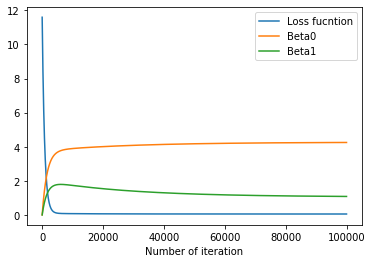

In [15]:
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration");